In [1]:
import pennylane as qml
import pennylane.numpy as np
import numpy as illegal_but_typed_np
from numpy.typing import NDArray

## 1. Set up circuit to optimize

In [2]:
from circuits import sim_02, sim_03, sim_04, sim_05

num_layers = 5
num_qubits = 4

# works as expected!
# circuit = sim_02(num_layers, num_qubits)
# initial_params = (
#     np.array(np.random.random((num_layers, num_qubits, 2))),
#     np.array([])
# )

# works as expected!
# circuit = sim_03(num_layers, num_qubits)
# initial_params = (
#     np.array(np.random.random((num_layers, num_qubits, 2))),
#     np.array(np.random.random((num_layers, num_qubits - 1)))
# )

circuit = sim_04(num_layers, num_qubits)
initial_params = (
    np.array(np.random.random((num_layers, num_qubits, 2))),
    np.array(np.random.random((num_layers, num_qubits - 1)))
)

# takes a long time and produces numerical errors
# circuit = sim_05(num_layers, num_qubits)
# initial_params = (
#     np.array(np.random.random((num_layers, num_qubits, 4))),
#     np.array(np.random.random((num_layers, num_qubits, num_qubits - 1)))
# )

print(qml.draw(circuit)(*initial_params))

# demo circuit from Rotosolve docs, crotosolve cannot solve this
# dev = qml.device('default.qubit', wires=3, shots=None)
# @qml.qnode(dev)
# def circuit(rot_param: NDArray, layer_param: float, crot_param: NDArray):
#     for i, par in enumerate(rot_param):
#         qml.RX(par, wires=i)
#     for w in dev.wires:
#         qml.RX(layer_param, wires=w)
#     for i, par in enumerate(crot_param):
#         qml.CRY(par, wires=[i, (i+1) % 3])
#     return qml.expval(qml.PauliZ(0) @ qml.PauliZ(1) @ qml.PauliZ(2))
# params = (
#     np.array([0.3, 0.2, 0.67], requires_grad=True),
#     np.array(1.1, requires_grad=True),
#     np.array([-0.2, 0.1, -2.5], requires_grad=True)
# )

0: ──RX(0.39)──RZ(0.25)─────────────────────╭RX(0.86)──||──RX(0.53)──RZ(0.47)────────────────────
1: ──RX(0.68)──RZ(0.56)───────────╭RX(0.67)─╰●─────────||──RX(0.45)──RZ(0.51)───────────╭RX(0.80)
2: ──RX(0.17)──RZ(0.55)─╭RX(0.34)─╰●───────────────────||──RX(0.69)──RZ(0.82)─╭RX(0.61)─╰●───────
3: ──RX(0.92)──RZ(0.24)─╰●─────────────────────────────||──RX(0.74)──RZ(0.45)─╰●─────────────────

──╭RX(0.02)──||──RX(0.18)──RZ(0.80)─────────────────────╭RX(0.25)──||──RX(0.93)──RZ(0.14)──────────
──╰●─────────||──RX(0.16)──RZ(0.83)───────────╭RX(0.80)─╰●─────────||──RX(0.76)──RZ(0.79)──────────
─────────────||──RX(0.90)──RZ(0.15)─╭RX(0.99)─╰●───────────────────||──RX(0.11)──RZ(0.67)─╭RX(0.28)
─────────────||──RX(0.54)──RZ(0.38)─╰●─────────────────────────────||──RX(0.76)──RZ(0.00)─╰●───────

────────────╭RX(0.08)──||──RX(0.13)──RZ(0.31)─────────────────────╭RX(0.64)──||─┤  <Z>
──╭RX(0.44)─╰●─────────||──RX(0.58)──RZ(0.18)───────────╭RX(0.01)─╰●─────────||─┤     
──╰●───────────────────||──RX(0.

## 2. Run optimizations

In [5]:
from optimizers import (
    OptimizationTask,
    OptimizationResult,
    optimizers
)

task = OptimizationTask(circuit=circuit, initial_params=initial_params)

results: dict[str, OptimizationResult] = {}
for name, optimize in optimizers:
    print(f"Optimizing with {name}...")
    result = optimize(task)
    results[name] = result

Optimizing with Crotosolve...
Optimizing with Rotosolve...
Optimizing with Gradient Descent...
0 -0.08494792994475647
20 -0.45341136876163535
40 -0.7014810590891234
60 -0.8392203935583218
80 -0.9096874180592824
100 -0.9449469591534655
120 -0.9627972936610721
Optimizing with Adam...
0 -0.11286790863376783
20 -0.7763140640673664
40 -0.9878747874547914
60 -0.9973929197451927
80 -0.9998534315108081
abort 83
Optimizing with Adagrad...
0 -0.11286753568769115
20 -0.41767389321769877
40 -0.5524059268743019
60 -0.6452439443045315
80 -0.7158125832551887
100 -0.7715713797925363
120 -0.8165717928779195


## 3. Plot loss curve

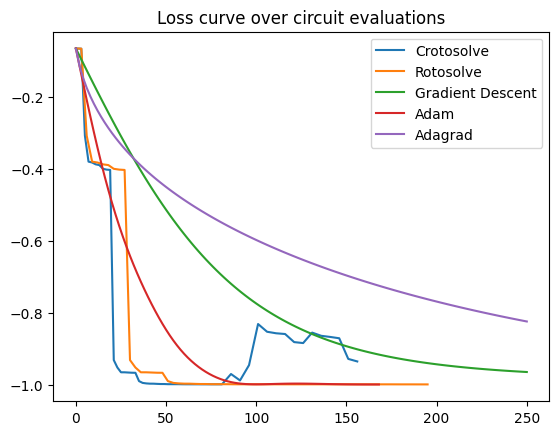

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_title("Loss curve over circuit evaluations")

for optimizer_name, result in results.items():
    x, y = zip(*result.loss) # this unzips the list of points

    ax.plot(x, y, label=f"{optimizer_name}")
    ax.legend()

## 4. Save data to disk

In [7]:
import pickle

file = "./sim04_results.pickle"

pickle.dump(results, open(file, "wb"))

# results = pickle.load(open(file, "rb"))